### Linear Regression with Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X = data
y = target
X_norm = preprocessing.minmax_scale(X)
X = X_norm

print("shape of X =", X.shape)
print("shape of y =", y.shape)
# print("feature names:", data["feature_names"])

shape of X = (506, 13)
shape of y = (506,)


In [3]:
# df = pd.DataFrame(data['data'], columns=data["feature_names"])
# for col in df.columns:
#     df[col+"2"] = df[col]**2
#     df[col+"3"] = df[col]**3
# df.head()

# X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)


model = linear_model.Ridge(alpha=0.5)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 21.742884431439357
MSE on testing data= 24.360674940640394


### Hyperparamter selection - validation set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

print("X_train shape = ", X_train.shape)
print("X_valid shape = ", X_valid.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (343, 13)
X_valid shape =  (61, 13)
X_test shape =  (102, 13)


In [5]:
alpha_test = [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]
mse_validation_all = {}
for alpha in alpha_test:
    model = linear_model.Ridge(alpha=alpha)
    model = model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    mse_validation = np.mean((y_pred_valid - y_valid)**2)
    mse_validation_all[alpha] = mse_validation

In [6]:
mse_validation_all

{0: np.float64(19.88375355506455),
 0.01: np.float64(19.895722986062708),
 0.1: np.float64(20.005330509218457),
 1: np.float64(21.198778346178923),
 10: np.float64(31.17053079059328),
 100: np.float64(56.33360063521483),
 1000: np.float64(80.85748019016253),
 10000: np.float64(87.44412930888026)}

In [7]:
final_model = linear_model.Ridge(alpha=0.0)
final_model = final_model.fit(X_train, y_train)
y_predict = final_model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - final_model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 22.053224959422472
MSE on testing data= 24.37245990360095


# Classification

## Example 4 - Logistic Regression, Breast Cancer Classification

In [8]:
data = datasets.load_breast_cancer()
X = data['data']
y = data['target']

print("shape of X =", X.shape)
print("shape of y =", y.shape)
print("feature names:", data["feature_names"])

shape of X = (569, 30)
shape of y = (569,)
feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
df = pd.DataFrame(data['data'], columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Normalization

In [11]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=100)

In [13]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=100)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 99.34065934065934
Testing accuracy (%) = 97.36842105263158


In [14]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [15]:
y_predict

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

## Example 5 - Logistic Regression, Digit Classification

In [16]:
data = datasets.load_digits(n_class=2)

In [17]:
X = data['data']
y = data['target']

print("shape of X =", X.shape)
print("shape of y =", y.shape)
print("feature names:", data["feature_names"])

shape of X = (360, 64)
shape of y = (360,)
feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [18]:
df = pd.DataFrame(X, columns=data["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0
4,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0


C:\Users\Takee\AppData\Local\Temp\ipykernel_17860\3204809155.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)
d:\Anaconda_3.13\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\Takee\AppData\Local\Temp\ipykernel_17860\3204809155.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)
d:\Anaconda_3.13\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\Takee\AppData\Local\Temp\ipykernel_17860\3204809155.py:8: FutureWarning: `imshow` is 

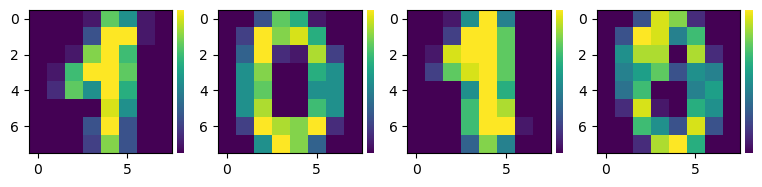

In [19]:
import random
from skimage import io

random.seed(382)
plt.figure(figsize=(8,8))
for i, img in enumerate(random.choices(data["images"], k=4)):
    plt.subplot(1, 4, i+1)
    io.imshow(img)
    plt.axis("off")

plt.show()

In [20]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns=data["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.428571,0.8125,0.6,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.6875,1.0,0.6250,0.0000,0.0
2,0.0,0.0,0.0625,0.5625,0.9375,0.6875,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.071429,0.6250,0.8,0.1875,0.0000,0.0
3,0.0,0.0,0.0000,0.0000,0.8750,0.8125,0.090909,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.000000,0.0625,0.8,1.0000,0.0625,0.0
4,0.0,0.0,0.1875,0.8125,0.6875,0.4375,0.000000,0.0,0.0,0.0,...,0.0625,0.0,0.0,0.0,0.142857,0.7500,0.8,0.2500,0.0000,0.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=100)

In [22]:
model = linear_model.LogisticRegression(C=1, fit_intercept=True, solver='lbfgs', max_iter=100)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 100.0
Testing accuracy (%) = 100.0
